In [6]:
#Importing libraries
import numpy as np
import cv2          #Cv2-python used to open the image file


In [7]:
# Reference/Uncompressed Image 1
Im1 = cv2.imread('ReferImage.png',)

# Distorted/Processed Image 2
Im2 = cv2.imread('DistoredImage.png',)

In [8]:
#Importing libraries for compressive sensing

import matplotlib.pyplot as plt
import pywt

In [9]:
# defined function for Compressive Sensing on Image 1

def CompSens(Im, CompRatio):

    Coeff = pywt.dwt2(Im, 'db2', mode='periodization')
    CoeffSor = np.sort(np.abs(Coeff[0].flatten()))[::-1]
    Index = int(np.floor(CompRatio * len(CoeffSor)))
    thres = CoeffSor[Index]
    Coeff[0][np.abs(Coeff[0]) < thres] = 0
    ImageComp = pywt.idwt2(Coeff, 'db2', mode='periodization')   
    return ImageComp


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

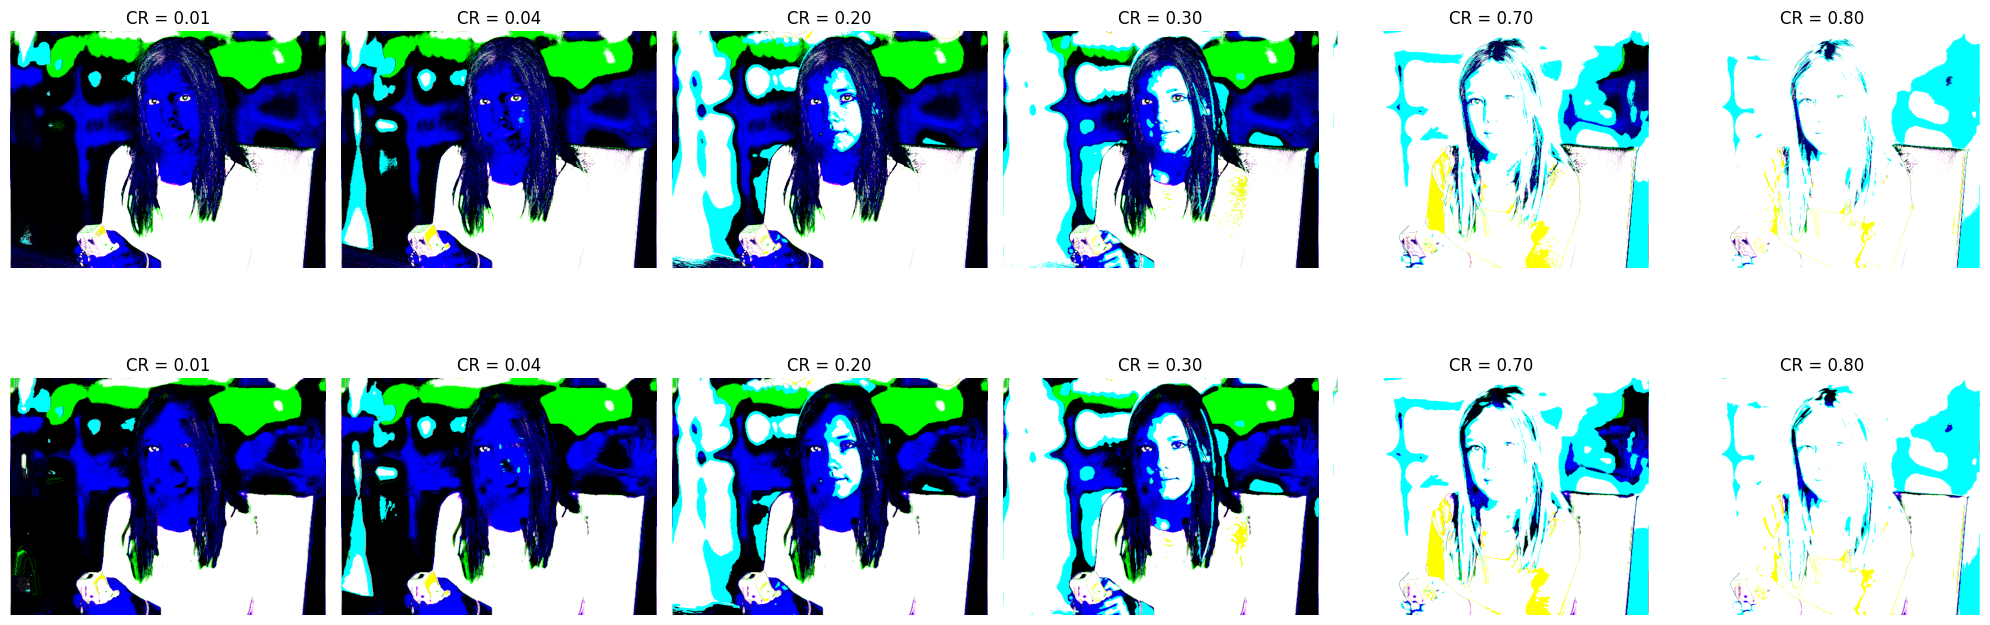

In [10]:
# Different Compression Ratios are defined
CompressRatios = [0.01, 0.04, 0.2, 0.3, 0.7, 0.8]

# Defined the no of rows, coloumns and size of each figure in plot
fig, axs = plt.subplots(2, len(CompressRatios), figsize=(20, 8))

# This will go for each compression ratio defined above for Image 1 and Image 2
for a, CompressRatio in enumerate(CompressRatios):
    # dECOMPRESS iMAGE1
    compressed_img1 = CompSens(Im1, CompressRatio)
    axs[0, a].imshow(compressed_img1)
    axs[0, a].axis('off')
    axs[0, a].set_title(f'CR = {CompressRatio:.2f}')
    
    # dECOMPRESS iMAGE2
    compressed_img2 = CompSens(Im2, CompressRatio)
    axs[1, a].imshow(compressed_img2)
    axs[1, a].axis('off')
    axs[1, a].set_title(f'CR = {CompressRatio:.2f}')

# defined Plot to show image
plt.tight_layout()
plt.show()